In [1]:
# Ignorar isso:
%config Completer.use_jedi =False

In [3]:
# importando os modulos necessários
import matplotlib.pyplot as plt
%matplotlib inline

# Computando a trajetória do acúmulo de capital com o tempo de acordo com o modelo de Solow


## O modelo:
Para Solow a economia apresenta a seguinte dinâmica:

$$ k(t+1) = k(t)^{\alpha} + (1- \delta)k(t) $$

Com nível de produto total em cada período:

$$ y(t) = k(t)^{\alpha} $$

E ela cresce até que atinja o *steady-state* , isto é, no ponto em que a taxa de crescimento de capital é constante, 
dada pela seguinte exoressão:

$$ \frac{s z}{n + \delta}^{\frac{1}{1-\alpha}} $$

Sendo:
* $s$ -> Propensão a poupar da economia
* $z$ -> Produtividade do trabalho
* $\alpha$ -> proporção da mão de obra na produção final
* $k$ -> Estoque de capital
* $\delta$ -> taxa de depreciação constante do capital em cada período
* $n$ -> taxa de crescimento populacional

In [52]:
class Solowqe:
    
    def __init__(self, n=0.05, # taxa de crescimento populacional
                       s=0.25, # taxa de poupança sobre renda
                       δ=0.1, # taxa de depreciação
                       α=0.3, # proporção da mão de obra na produção final
                       z=2.0, # produtividade
                       k=1.0): # Estoque de capital corrente
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k
    def h(self):
    
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z #linha só para se livrar do "self."
        # Aplicando o calculo do estoque de capital pro próximo período
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)
    def atualizar(self):
        "Atualiza estado atual (i.e., Estoque de capital."
        self.k = self.h()
    def steady_state(self):
        "Calcula steady-state, pra onde a economia vai convergir para uma taxa de crescimento de capital."
        
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z  # Se livrar de "self."
    
        return ((s * z) / (n + δ))**(1 / (1 - α))  # Calcula e retorna o valor do steady-state
    def gerar_série_do_estoque(self, t):
        
        """Gerar estoque série de estoque de capital até  t escolhido"""
        path = []
        for i in range(t):
            path.append(self.k)
            self.atualizar()
        return path       

### Essa última celula de código não importa, e sim para ilustrar as capacidades de programar em python:

In [53]:
# por exemplo:
x = 1
type(x)

int

In [54]:
# o python diz que é um inteiro, complicando um pouco mais:
y = [1,2,3,4,5,6]
type(y)

list

In [55]:
# ele diz que é uma lista, tudo em python é um ojeto, seja uma número inteiro ou uma lista, e cada tipo de objeto
# tem métodos, que são funções que podem ser aplicadas a esse tipo de objeto, por exemplo:
y.append(7)      # nesse caso estão utilizando o método de inserir um novo elemento na lista 
print(y)

[1, 2, 3, 4, 5, 6, 7]


In [56]:
# agora vou utilizar a biblioteca numpy
import numpy as np
z = np.array([1,10,15,17,19,20])
print(type(z))
z.mean()

<class 'numpy.ndarray'>


13.666666666666666

In [ ]:
# nesse caso o python disse que z era uma array e ainda que objetos do tipo array tem o método mean(),
# que é simplesmente a média aritmética dos elementos

### Por isso criei o tipo Solow, pois posso criar métodos e implementar da forma que quiser, posso inclusive comparar a convergência enre dois modelos, por exemplo:

In [57]:
s1 = Solowqe(k=8)  # um que começa com estoque de capital 8
s2 = Solowqe(k=12) # outro que começa com estoque de capital 12
# note que os valores dados na criação class Solow são só por default, posso alterá-los também:
s3 = Solowqe(k=8,δ=0.5) # por exemplo

In [58]:
type(s1)

__main__.Solowqe

### Diferença de convvergencia entre s1 e s2:

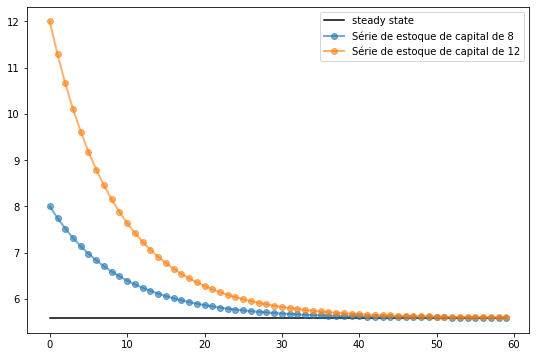

In [59]:
T = 60
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot([s1.steady_state()]*T, 'k-', label='steady state') # colocando linha horizontal comum aos modelos
        # Plotando a sperie de tempo nesse caso pra dois modelos
for s in s1, s2:
    lb = f'Série de estoque de capital de {s.k}'
    ax.plot(s.gerar_série_do_estoque(T), 'o-', lw=2, alpha=0.6, label=lb)
ax.legend()
plt.show()